In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

In [2]:
results_path = '../Metrics/Results/'

In [3]:
csv_paths = sorted(glob(results_path + '*'))

In [4]:
def get_method(name):
    s = name
    s = s.split('/')[1]
    s = s.split('-', 1)[1]

    if s.startswith('tsne'):
        return s[:7]
    elif s.startswith('dtsne'):
        return 'dtsne'
    elif s.startswith('pca'):
        return s[:6]
    else:
        return s.split('_')[0]


In [5]:
df_metrics = pd.DataFrame()
for p in csv_paths:
    df = pd.read_csv(p)
    df = df.drop(['spat_kl', 'stab_kl'], axis=1)  # Bad metric
    # Extract dataset and method into own column
    df.columns = np.concatenate([['name'], df.columns.values[1:]])
    df['dataset'] = df['name'].str.split('_', 1).str[0].str.extract(r'.*/(.*)-.*')
    df['method'] = df['name'].apply(get_method)
    df = df.set_index('name')
    
    # Average nh and np metrics 
    nh_cols = [c for c in df.columns if 'spat_nh_' in c]
    df['spat_nh_mean'] = np.mean(df[nh_cols], axis=1)
#     df = df.drop(nh_cols, axis=1)
    np_cols = [c for c in df.columns if 'spat_np_' in c]
    df['spat_np_mean'] = np.mean(df[np_cols], axis=1)
#     df = df.drop(np_cols, axis=1)
    df_metrics = pd.concat([df_metrics, df])

In [6]:
np_cols = [c for c in df.columns if 'spat_np_' in c]
np.mean(df[np_cols], axis=1)

name
Output/walk-AE_10f_10f_2f_20ep.csv      0.481985
Output/walk-VAE_100f_10f_2f_20ep.csv    0.481074
Output/walk-tsne_s1_30p.csv             0.476209
Output/walk-tsne_s4_30p.csv             0.462251
Output/walk-dtsne_100p_0-01l.csv        0.471319
Output/walk-pca_s1.csv                  0.483420
Output/walk-pca_s4.csv                  0.483167
dtype: float64

In [7]:
# vs = []
# indexes = []
# for i, df in df_metrics.groupby('method'):
# #     print(i), display(df)
#     indexes.append(i)
#     vs.append(np.mean(df, axis=0))

    
# # methods = ['AE', 'C2AE', 'VAE', 'C2VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'pca_s1', 'pca_s4']
# methods = ['AE', 'VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'pca_s1', 'pca_s4']

# df_per_method = pd.DataFrame(vs, indexes)
# df_per_method = df_per_method
# # df_per_method.index = indexes
# df_per_method = df_per_method.reindex(methods)

In [8]:
methods = ['AE', 'VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'pca_s1', 'pca_s4']
metrics = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_n', 'spat_stress_s', 'spat_nh_mean', 'spat_np_mean', '', 'stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_n', 'stab_stress_s']
invert_colormap = ['stab_stress_n', 'stab_stress_s', 'spat_stress_n', 'spat_stress_s']


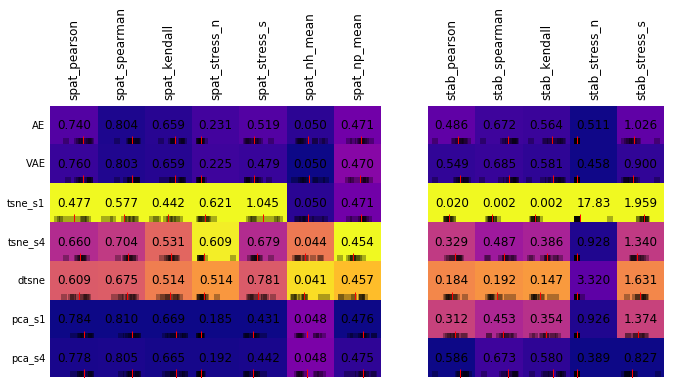

In [9]:
def get_values_for_scatter(method, metric):
    return df_metrics[df_metrics['method'] == method][metric].values

def make_cell(values, metric, limits, ax):
    avg = np.mean(values)
    
    norm = matplotlib.colors.Normalize(vmin=limits[0], vmax=limits[1])
    if metric in invert_colormap:
        cmap = plt.cm.get_cmap('plasma')        
    else:
        cmap = plt.cm.get_cmap('plasma_r')

    cell_color = cmap(norm(np.mean(values)))
    ax.set_facecolor(cell_color)
        
    ax.plot(values, np.zeros(len(values)), 'ks', alpha=0.3, fillstyle='full', markeredgewidth=0.0)
    ax.plot([avg], [0.0], 'r|', ms=10)
    text = str(avg)[:5]
    
    ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12, transform=ax.transAxes) # Need to be sure of the center
    ax.set_ylim((-0.0008, 0.01))
    
    
    
fig, axs = plt.subplots(7, 13, sharex='col', sharey='row', figsize=(11,5),
                        gridspec_kw={'hspace': 0, 'wspace': 0})


for col_index, metric in enumerate(metrics):
    if metric == '':
        for row_index, method in enumerate(methods):
            ax = axs[row_index, col_index]
            ax.set_visible(False)
    else:
        metric_min = min(df_metrics.groupby('method')[metric].mean())
        metric_max = max(df_metrics.groupby('method')[metric].mean())        

        for row_index, method in enumerate(methods):
            values = get_values_for_scatter(method, metric)

            ax = axs[row_index, col_index]
            ax.set_yticks([])
            ax.set_xticks([])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.margins(0.2)

            if col_index == 0:
                ax.set_ylabel(method, rotation=0, ha='right', va='center', labelpad=5)
            if row_index == 0:
                ax.set_title(metric, rotation=90, ha='center', va='bottom')

            make_cell(values, metric, (metric_min, metric_max),ax)    


In [10]:
# fig.savefig('1_plasma.pdf')

In [11]:
# Figure 2 - all datasets summary in one page

In [12]:
metrics_0 = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_n', 'spat_stress_s'] 
metrics_1 = ['spat_nh_'+str(i) for i in range(1,51)]
metrics_2 = ['spat_np_'+str(i) for i in range(1,51)]
metrics_3 = ['stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_n', 'stab_stress_s']

metrics = metrics_0 + metrics_1 + metrics_2 + metrics_3
n_metrics = len(metrics)

In [13]:
n_datasets = len(df_metrics['dataset'].unique())
n_runs = df_metrics.shape[0]

In [14]:
matrix = []
for _, df_dataset in df_metrics.groupby('dataset'):
    values = np.vstack((df_dataset[metrics].values, np.zeros(n_metrics)))
    matrix.append(values)
    break

In [15]:
matrix = np.array(matrix)
matrix = np.reshape(matrix, (matrix.shape[1], matrix.shape[2]))
matrix.shape

(8, 110)

Text(-50, 10, '1st (left): Spatial metrics\n2nd:Neighborhood hit\n3rd:Neighborhood preservation\n4th:Stability')

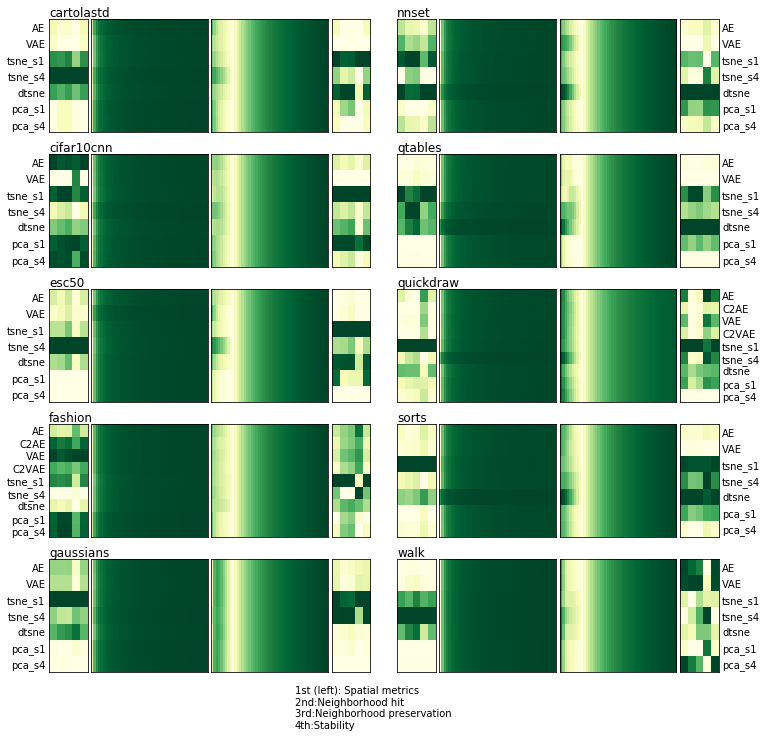

In [74]:
def plot_matrix(ax, df, cell_text=False, invert_colormap=[], title=None, xticks=True, show=True, normalize_per_column=True):
    matrix = df.values
    metric_ids = df.columns
    dataset_ids = df.index

    # The colormap range is independent for each column
    if normalize_per_column:
        for i, metric in enumerate(metric_ids):
            # Make all rows invalid (fill with 1) except the target one (col)
            m = np.ones_like(matrix)
            m[:, i] = 0
            masked = np.ma.masked_array(matrix, m)
            if metric in invert_colormap:
                colormap = plt.cm.YlGn
            else:
                colormap = plt.cm.YlGn_r

            if(np.sum(masked) != 0.0):  # Check if spacer column
                ax.matshow(masked, cmap=colormap, aspect='auto')
    else:
        colormap = plt.cm.YlGn_r
        mat = ax.matshow(matrix, cmap=colormap, aspect='auto')
        
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])



fig, axs = plt.subplots(nrows=n_datasets//2, ncols=9, figsize=(12, 12),
                       gridspec_kw={'width_ratios': [1, 3, 3, 1, 0.5, 1, 3, 3, 1],
                                    'wspace': 0.05})

for i, (dataset, df) in enumerate(df_metrics.groupby('dataset')):
    row_index = i % 5
    col_index = (i // 5) * 5
    
    ax = axs[row_index, col_index + 0]
    df_0 = df[metrics_0 + ['method']]
    df_0 = df_0.set_index('method')
    plot_matrix(ax, df_0, invert_colormap=['spat_stress_n', 'spat_stress_s'])
    if col_index == 0:    
        ax.set_yticklabels(df_0.index)
        ax.set_yticks(range(len(df_0)), minor=False)
    ax.set_title(dataset, loc='left', ha='left', va='bottom', pad=0)

    ax = axs[row_index, col_index + 1]
    df_1 = df[metrics_1 + ['method']]
    df_1 = df_1.set_index('method')
    plot_matrix(ax, df_1, normalize_per_column=False)
    
    ax = axs[row_index, col_index + 2]
    df_2 = df[metrics_2 + ['method']]
    df_2 = df_2.set_index('method')
    plot_matrix(ax, df_2, normalize_per_column=False)
    
    ax = axs[row_index, col_index + 3]
    df_3 = df[metrics_3 + ['method']]
    df_3 = df_3.set_index('method')
    plot_matrix(ax, df_3, invert_colormap=['stab_stress_n', 'stab_stress_s'])    
    if col_index == 5:
        ax.yaxis.tick_right()
        ax.set_yticklabels(df_0.index)
        ax.set_yticks(range(len(df_0)), minor=False)
        
for i in range(n_datasets//2):
    axs[i,4].set_visible(False)
    
t = '1st (left): Spatial metrics\n2nd:Neighborhood hit\n3rd:Neighborhood preservation\n4th:Stability'
plt.text(-50, 10, t, ha='left', wrap=True)


In [75]:
fig.savefig('2_YlGn.pdf')

In [90]:
def normalized_stress(nd_d, md_d):
    return np.sum(np.square(np.subtract(nd_dists, md_dists))) / np.sum(np.square(nd_d))

In [96]:
nd_dists = [0.1, 0.5, 0.3]
md_dists = [0.1, 0.9, 0.9]
normalized_stress(nd_dists, md_dists)

1.4857142857142862

In [94]:
nd_dists = [0.3, 0.5, 0.1]
md_dists = [0.1, 0.3, 0.9]
normalized_stress(nd_dists, md_dists)

2.0571428571428574